# Neuron class

In [1]:
import math

class Neuron:
    weights = []

    def __init__(self):
        pass
    
    def param_sum(self, x, bias, w):
        return sum(w[i]*x[i] for i in range(len(x))) + bias

    def threshold_function(self, x, bias, w = weights):
        return (int)(self.param_sum(x, bias, w) > 0)

    def sigmoid_function(self, x, bias, w = weights):
        return (1/(1+math.exp(-1*self.param_sum(x, bias, w))) > 0.5)


# Setup
## Static data

In [2]:
class Dataset:
    x = [(0.2, 0.5), (0.2, -0.7), (0.8, -0.8), (0.8, 1)]
    f = [0, 0, 1, 1]
    bStatic = -4.5

    def __init__(self):
        pass


## Random
### generator
Random number pair generator for weight generatio. Need to use seed, to quickly generate new randoms, as the basic random method returns the same values

In [15]:
import random
from pandas import Timestamp

randi = 0
def new_rand():
    global randi
    randi += 1
    return [random.random() *40 -20 for _ in range(2)]

## Check random weights, if they work with current dataset

In [4]:
def check_weights(dataset, weights, function):
    verdict = True
    for i in range(dataset.x.__len__()):
        if function(dataset.x[i], dataset.bStatic, weights) != dataset.f[i]:
            verdict = False
            break
    return verdict

# Start section

ToggleButtons(description='Choose activation function:', options=('Sigmoid', 'Threshold'), value='Sigmoid')

Button(description='Run', style=ButtonStyle())

(10.731434884634105, 13.55206650598278, 11.077847682950136, 10.610612255826197, 11.01699457540272, 16.907814167193152) (3.7296005642402434, -2.4651272400105526, -0.23134531432900118, 0.9698810954854338, -2.1820390958049742, -0.042479411998634475)


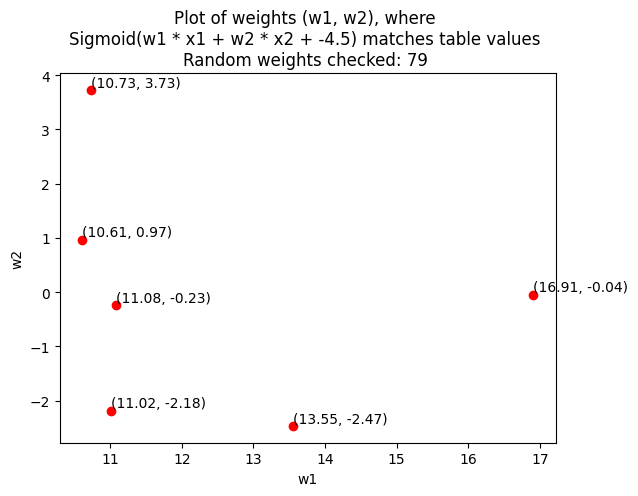

(16.813790490162262, 14.277166674756558, 9.136937073004574, 11.206145605253212, 9.886222218854176, 12.52043253500824) (0.33590847350752284, -0.02227973420959728, 1.5494565409706311, 2.4696102496925256, -1.9402414630419287, 2.668529084383163)


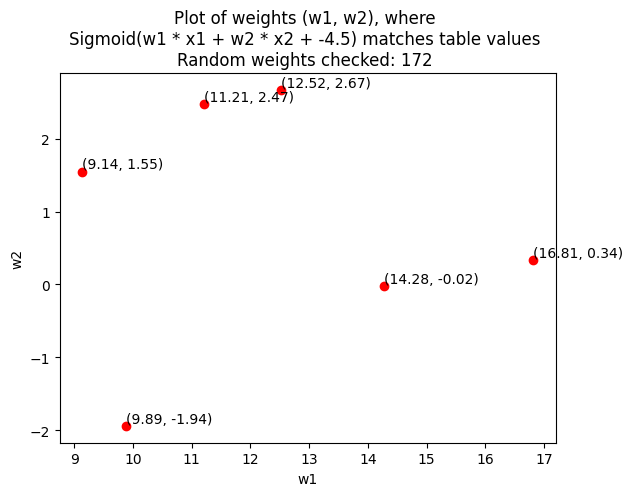

In [16]:
import ipywidgets as widgets
import matplotlib.pyplot as plt


# create a neuron object
neuron = Neuron()
# dataset of x values and expected activation function f values
dataset = Dataset()

# Create a dictionary that maps function names to functions
functions = { "Sigmoid": neuron.sigmoid_function, "Threshold": neuron.threshold_function}

# Create a ToggleButtons widget
toggle = widgets.ToggleButtons(
    # Use function names as options
    options=functions.keys(),  
    description='Choose activation function:',
)
# Display the widget
display(toggle)

# Create a button that will run the selected function when clicked
button = widgets.Button(description="Run")


def on_run_clicked(b):
    b.description = "Running..."
    res = []
    global randi
    randi = 0

    # this is the main random weight search loop
    # it generates a random weight, checks if it is valid and if so, adds it to the list
    # it does this until it has found 6 valid weights or tried 20000 times (whichever comes first)
    while (randi < 2000) and (len(res) <= 5):
        random_weights = new_rand()
        if(check_weights(dataset, random_weights, functions[toggle.value])):      
            res.append(random_weights)
    
    b.description = "Run"

    # If no valid weights were found, print an error message
    if res.__len__() == 0:
        print(f'No valid weights found after {randi} attempts')
        return
    
    # Unpack the pairs into two lists
    x_values, y_values = zip(*res)
    print(x_values, y_values)
    # Create a scatter plot
    plt.plot(x_values, y_values, 'ro')
    plt.title(f'Plot of weights (w1, w2), where \n{toggle.value}(w1 * x1 + w2 * x2 + {dataset.bStatic}) matches table values \nRandom weights checked: {randi} ')

    plt.xlabel('w1')
    plt.ylabel('w2')

    # Add labels for each point with 2 decimal numbers
    for i in range(len(res)):
        plt.text(res[i][0], res[i][1], f'({round(res[i][0], 2)}, {round(res[i][1], 2)})', ha='left', va='bottom')

# Register the callback function with the button
button.on_click(on_run_clicked)
display(button)
# Run the function to display the output
# debugging only
# button.click()

In [11]:
for i in range(200):
    print((random.random(), random.random()))

(0.28206639934391375, 0.8180046456379655)
(0.7381207424946598, 0.3381643142245955)
(0.7846504008777117, 0.748365298847426)
(0.3950078390983103, 0.37550937135887275)
(0.5809305458368988, 0.9961261856776974)
(0.6066574840118666, 0.8113240801104056)
(0.8514004288427862, 0.25351375469432624)
(0.5200128659214511, 0.9886172815896617)
(0.9293923304207579, 0.07845773253742272)
(0.29339711462295337, 0.6313071171544957)
(0.6420817694726078, 0.2533842447791781)
(0.7733627273828378, 0.795457482268301)
(0.6408602527623185, 0.09816397881152061)
(0.436270610725112, 0.929328243416481)
(0.7007892763792202, 0.8103440558505096)
(0.44988244520130904, 0.5516566948425689)
(0.8142266081499379, 0.5894946519844597)
(0.4407932402066761, 0.4491555081480184)
(0.2806972737972496, 0.07169958302985868)
(0.24641193054922916, 0.3729131753894549)
(0.8273584879207277, 0.6286150193717621)
(0.27183104608212727, 0.642901162707322)
(0.5365803396371343, 0.7749350992730224)
(0.44487632739980143, 0.8154312091173347)
(0.1811774